1) Imports and loading dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [3]:
train_data= pd.read_csv(r'C:\Users\nourm\OneDrive\Desktop\PROJECTS\Food_Delivery_Time_Predictor\FDT_Predictor\Dataset\train.csv')

test_data= pd.read_csv(r'C:\Users\nourm\OneDrive\Desktop\PROJECTS\Food_Delivery_Time_Predictor\FDT_Predictor\Dataset\test.csv')

Data exploration

In [4]:
print(train_data.shape)
print("\n")
print(test_data.shape)
print("\n")
print(train_data.dtypes)
print("\n")
print(test_data.dtypes)
print("\n")
train_data.info()
print("\n")
train_data.columns


(45593, 20)


(11399, 19)


ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object


ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude 

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [5]:
train_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [6]:
test_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [7]:
train_data.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [8]:
test_data.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,11399.000000,11399.000000,11399.000000,11399.000000,11399.000000
mean,17.099934,70.399259,17.569497,71.102187,1.031406
std,8.193510,22.773144,7.287440,20.693782,0.839599
min,-30.902872,-88.400467,0.010000,0.010000,0.000000
25%,12.933284,73.170937,12.992532,73.771081,0.000000
50%,18.551440,75.897429,18.643481,75.996959,1.000000
75%,22.732225,78.045732,22.791226,78.109004,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [9]:
train_data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [10]:
train_data.duplicated().sum()

0

Preprocessing and data cleaning

In [11]:
data1=train_data.copy()
#clean Time_taken(min) - remove min and convert to numeric
data1['Time_taken(min)'] = data1['Time_taken(min)'].str.replace('(min)' , '' , regex=False)


data1['Time_taken(min)'] = pd.to_numeric(data1['Time_taken(min)'] , errors='coerce')

#convert delivery person's age , rating and multiple deliveries to numeric

data1['Delivery_person_Age']=pd.to_numeric(data1['Delivery_person_Age'] , errors='coerce')

data1['Delivery_person_Ratings'] = pd.to_numeric(data1['Delivery_person_Ratings'], errors='coerce')

data1['multiple_deliveries'] = pd.to_numeric(data1['multiple_deliveries'], errors='coerce')

# Converting order_date dtype into datetime
data1['Order_Date']=pd.to_datetime(data1['Order_Date'])


#handle missing values
data1 = data1.dropna()

#drop id , not needed
data1.drop('ID',axis=1,inplace=True)


print(f"data shape post cleaning : {data1.shape}")



data shape post cleaning : (42752, 19)


C:\Users\nourm\AppData\Local\Temp\ipykernel_19800\3745762658.py:17: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data1['Order_Date']=pd.to_datetime(data1['Order_Date'])


In [12]:
data1.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30


In [13]:
data2=test_data.copy()

# convert delivery person's age , rating and multiple deliveries to numeric
data2['Delivery_person_Age'] = pd.to_numeric(data2['Delivery_person_Age'] , errors='coerce')

data2['Delivery_person_Ratings'] = pd.to_numeric(data2['Delivery_person_Ratings'], errors='coerce')

data2['multiple_deliveries'] = pd.to_numeric(data2['multiple_deliveries'], errors='coerce')

# Converting order_date dtype into datetime
data2['Order_Date'] = pd.to_datetime(data2['Order_Date'])


# handle missing values
data2 = data2.dropna()

# drop id , not needed
data2.drop('ID', axis=1, inplace=True)

print(f"data shape post cleaning : {data2.shape}")

data2.head()


data shape post cleaning : (10668, 18)


C:\Users\nourm\AppData\Local\Temp\ipykernel_19800\2392989369.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data2['Order_Date'] = pd.to_datetime(data2['Order_Date'])


,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
1,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian
2,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,2022-03-10,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian
3,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2022-04-02,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian
4,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian
5,GOARES04DEL01,26.0,4.7,15.569600,73.742294,15.579600,73.752294,2022-02-15,09:45:00,09:55:00,conditions Fog,Low,0,Drinks,motorcycle,1.0,No,Metropolitian


Feature engineering

In [14]:
def calculate_distance(lat1,lon1,lat2,lon2):
  R=6371 #earth's radius in kilometers
  lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
  dlat = lat2 - lat1
  dlon = lon2 - lon1
  a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
  return 2 * R * np.arcsin(np.sqrt(a))

data1['distance_km'] = calculate_distance(data1['Restaurant_latitude'], data1['Restaurant_longitude'],
        data1['Delivery_location_latitude'], data1['Delivery_location_longitude'])

In [15]:
# Creating three column for day,month and year
data1['Order_day']=data1['Order_Date'].dt.day
data1['Order_month']=data1['Order_Date'].dt.month
data1['Order_year']=data1['Order_Date'].dt.year

# Creating three column for day,month and year
data2['Order_day']=data2['Order_Date'].dt.day
data2['Order_month']=data2['Order_Date'].dt.month
data2['Order_year']=data2['Order_Date'].dt.year

In [16]:
# Creating two new column for hour and minute
data1['Time_Orderd'] = pd.to_datetime(data1['Time_Orderd'], format='%H:%M:%S', errors='coerce') #must turn to date time first
data1['Hour_order']=data1['Time_Orderd'].dt.hour
data1['Min_order']=data1['Time_Orderd'].dt.minute

data2['Time_Orderd'] = pd.to_datetime(data2['Time_Orderd'], format='%H:%M:%S', errors='coerce')
data2['Hour_order']=data2['Time_Orderd'].dt.hour
data2['Min_order']=data2['Time_Orderd'].dt.minute

Encode categorical variables

In [17]:
categorical_columns = ['Weatherconditions', 'Road_traffic_density', 'Type_of_order', 
                          'Type_of_vehicle', 'Festival', 'City']

label_encoders = {}
for col in categorical_columns:
 label_encoder=LabelEncoder()
 data1[col+'_encoded'] = label_encoder.fit_transform(data1[col])

In [18]:
data1.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Order_month,Order_year,Hour_order,Min_order,Weatherconditions_encoded,Road_traffic_density_encoded,Type_of_order_encoded,Type_of_vehicle_encoded,Festival_encoded,City_encoded
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,1900-01-01 11:30:00,11:45:00,...,3,2022,11.0,30.0,5,0,3,2,1,3
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,1900-01-01 19:45:00,19:50:00,...,3,2022,19.0,45.0,4,1,3,3,1,0
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,1900-01-01 08:30:00,08:45:00,...,3,2022,8.0,30.0,3,2,1,2,1,3
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,1900-01-01 18:00:00,18:10:00,...,4,2022,18.0,0.0,5,3,0,2,1,0
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,1900-01-01 13:30:00,13:45:00,...,3,2022,13.0,30.0,0,0,3,3,1,0


In [19]:
data1.shape

(42752, 31)

In [20]:
data1.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'distance_km', 'Order_day', 'Order_month',
       'Order_year', 'Hour_order', 'Min_order', 'Weatherconditions_encoded',
       'Road_traffic_density_encoded', 'Type_of_order_encoded',
       'Type_of_vehicle_encoded', 'Festival_encoded', 'City_encoded'],
      dtype='object')

In [21]:
feature_columns = [
        'Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
        'multiple_deliveries', 'distance_km','Order_day', 'Order_month',
       'Order_year', 'Hour_order', 'Min_order' ,
        'Weatherconditions_encoded', 'Road_traffic_density_encoded',
        'Type_of_order_encoded', 'Type_of_vehicle_encoded', 
        'Festival_encoded', 'City_encoded'
    ]

X = data1[feature_columns]
y = data1['Time_taken(min)']

#data split

X_train , X_test , y_train , y_test= train_test_split( X , y , test_size=0.2, random_state=42)

#scale features

scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
# Add distance calculation for test data
data2['distance_km'] = calculate_distance(data2['Restaurant_latitude'], data2['Restaurant_longitude'],
        data2['Delivery_location_latitude'], data2['Delivery_location_longitude'])

# Add categorical encoding for test data
for col in categorical_columns:
    if col in data1.columns and col in data2.columns:
        # Use the same encoder fitted on training data
        try:
            data2[col+'_encoded'] = label_encoder.transform(data2[col])
        except:
            # Handle unseen categories
            data2[col+'_encoded'] = 0

In [22]:
X_train_scaled.shape

(34201, 16)

In [23]:
X_test_scaled.shape

(8551, 16)

Build model

In [34]:
x_shape = X_train_scaled.shape[1]  # This gives you just 16 (number of features)

model= Sequential ([
  #input layer
  layers.Dense(128, activation='relu', input_shape=(x_shape,)),  # Note the comma!
  layers.Dropout(0.3), 
  #hidden layers
  layers.Dense(64 , activation = 'relu') ,layers.Dropout(0.3) ,
  layers.Dense(32, activation='relu'),layers.Dropout(0.2),
  layers.Dense(16, activation='relu'),
  # Output layer
  layers.Dense(1, activation='linear')  # Linear for regression
])

model.compile(optimizer='adam' , loss='mean_squared_error' ,metrics=['mean_absolute_error'] )

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               2176      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)               

In [53]:
def fix_nan_data(X_train, y_train, X_test, y_test):
    X_train_fixed = np.nan_to_num(X_train, nan=0.0)
    X_test_fixed = np.nan_to_num(X_test, nan=0.0)
    y_train_fixed = np.nan_to_num(y_train, nan=0.0)
    y_test_fixed = np.nan_to_num(y_test, nan=0.0)
     
    return X_train_fixed, y_train_fixed, X_test_fixed, y_test_fixed

In [ ]:
X_train_fixed, y_train_fixed, X_test_fixed, y_test_fixed = fix_nan_data(X_train_scaled, y_train, X_test_scaled, y_test)

In [37]:
early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )
    
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.0001
)

# Train the model
history = model.fit(
    X_train_fixed, y_train_fixed,
    batch_size=32,
    epochs=100,
    validation_data=(X_test_fixed, y_test_fixed),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
1069/1069 [==============================] - 9s 8ms/step - loss: 45.0299 - mean_absolute_error: 5.3023 - val_loss: 67.1626 - val_mean_absolute_error: 6.5068 - lr: 0.0010
Epoch 2/100
1069/1069 [==============================] - 12s 11ms/step - loss: 42.8381 - mean_absolute_error: 5.1861 - val_loss: 80.8019 - val_mean_absolute_error: 7.1901 - lr: 0.0010
Epoch 3/100
1069/1069 [==============================] - 13s 12ms/step - loss: 40.9307 - mean_absolute_error: 5.0629 - val_loss: 59.7863 - val_mean_absolute_error: 6.1407 - lr: 0.0010
Epoch 4/100
1069/1069 [==============================] - 9s 8ms/step - loss: 39.8146 - mean_absolute_error: 5.0087 - val_loss: 60.4808 - val_mean_absolute_error: 6.1740 - lr: 0.0010
Epoch 5/100
1069/1069 [==============================] - 12s 11ms/step - loss: 39.2603 - mean_absolute_error: 4.9716 - val_loss: 59.4321 - val_mean_absolute_error: 6.1262 - lr: 0.0010
Epoch 6/100
1069/1069 [==============================] - 12s 11ms/step - loss: 38.07

Evaluate model performance


In [39]:
y_prediction= model.predict(X_test_fixed).flatten()
mae = mean_absolute_error(y_test_fixed , y_prediction)
mse = mean_squared_error(y_test_fixed, y_prediction)
rmse = np.sqrt(mse)
print(f"Model Performance:")
print(f"Mean Absolute Error: {mae:.2f} minutes")
print(f"Root Mean Square Error: {rmse:.2f} minutes")
print(f"Mean Delivery Time: {y_test_fixed.mean():.2f} minutes")

268/268 [==============================] - 0s 1ms/step
Model Performance:
Mean Absolute Error: 3.53 minutes
Root Mean Square Error: 4.54 minutes
Mean Delivery Time: 26.45 minutes


Plot training history

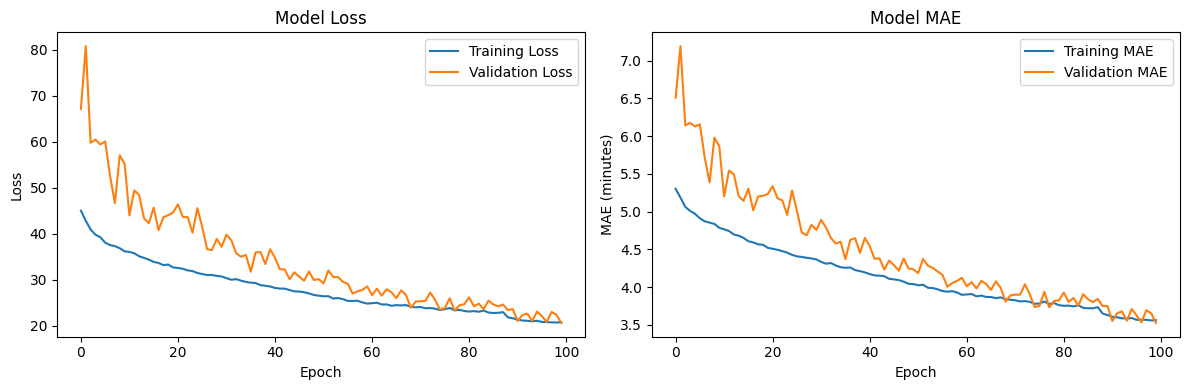

In [40]:
# Plot training curves
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE (minutes)')
plt.legend()

plt.tight_layout()
plt.show()

Visualize Predictions vs Actual


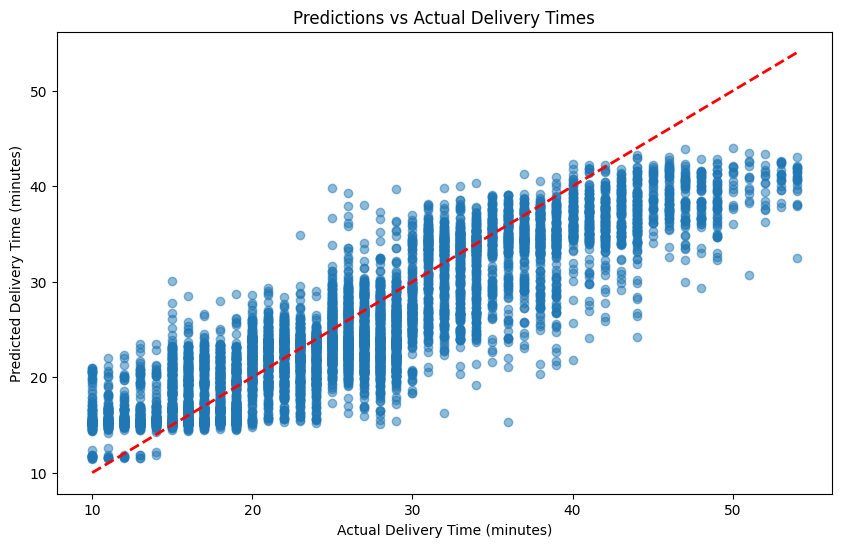

R² Score: 0.768


In [41]:
# Scatter plot of predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_fixed, y_prediction, alpha=0.5)
plt.plot([y_test_fixed.min(), y_test_fixed.max()], [y_test_fixed.min(), y_test_fixed.max()], 'r--', lw=2)
plt.xlabel('Actual Delivery Time (minutes)')
plt.ylabel('Predicted Delivery Time (minutes)')
plt.title('Predictions vs Actual Delivery Times')
plt.show()

# Calculate R² score
from sklearn.metrics import r2_score
r2 = r2_score(y_test_fixed, y_prediction)
print(f"R² Score: {r2:.3f}")

In [42]:
# Save the trained model
model.save('delivery_time_predictor.h5')
print("Model saved as 'delivery_time_predictor.h5'")

# Save the scaler for future use
import joblib
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

Model saved as 'delivery_time_predictor.h5'
Scaler saved as 'scaler.pkl'


In [43]:
def predict_delivery_time(model, scaler, new_data, feature_columns):
    """Make prediction on new data"""
    # Ensure new_data has the same features and preprocessing
    new_data_scaled = scaler.transform(new_data[feature_columns])
    prediction = model.predict(new_data_scaled)
    return prediction.flatten()

In [52]:
scenarios = pd.DataFrame({
    'Delivery_person_Age': [25, 35, 28, 30],
    'Delivery_person_Ratings': [4.2, 4.8, 4.5, 4.0],
    'Vehicle_condition': [1, 2, 2, 0],
    'multiple_deliveries': [0, 1, 1, 2],
    'distance_km': [2.1, 5.2, 8.3, 3.5],
    'Order_day': [15, 15, 15, 15],
    'Order_month': [9, 9, 9, 9],
    'Order_year': [2024, 2024, 2024, 2024],
    'Hour_order': [12, 19, 21, 13],  # Lunch, dinner, late night, afternoon
    'Min_order': [30, 30, 15, 45],
    'Weatherconditions_encoded': [1, 0, 2, 1],  # Sunny, Stormy, Cloudy, Sunny
    'Road_traffic_density_encoded': [0, 2, 1, 0],  # Low, High, Medium, Low
    'Type_of_order_encoded': [1, 0, 2, 1],  # Snack, Meal, Drinks, Snack
    'Type_of_vehicle_encoded': [1, 1, 0, 1],  # motorcycle, motorcycle, scooter, motorcycle
    'Festival_encoded': [0, 0, 0, 0],
    'City_encoded': [1, 2, 2, 1]  # Metro, Urban, Urban, Metro
})

scenario_names = [
    "Quick Lunch (Short distance, good weather)",
    "Dinner Rush (Long distance, stormy weather, high traffic)",
    "Late Night (Very long distance, multiple deliveries)",
    "Afternoon Snack (Medium distance, perfect conditions)"
]

predictions = predict_delivery_time(model, scaler, scenarios, feature_columns)

print('\n')
print("DELIVERY TIME PREDICTIONS FOR DIFFERENT SCENARIOS:")
print('\n')
for i, (name, time) in enumerate(zip(scenario_names, predictions)):
    print(f"{name}")
    print(f" Estimated time: {time:.1f} minutes")
    print()

1/1 [==============================] - 0s 24ms/step


DELIVERY TIME PREDICTIONS FOR DIFFERENT SCENARIOS:


Quick Lunch (Short distance, good weather)
 Estimated time: 14.9 minutes

Dinner Rush (Long distance, stormy weather, high traffic)
 Estimated time: 11.7 minutes

Late Night (Very long distance, multiple deliveries)
 Estimated time: 12.8 minutes

Afternoon Snack (Medium distance, perfect conditions)
 Estimated time: 29.4 minutes

